### Hyperparameter Tuning

***

### Introduction:

### Hyperparameter tuning is a crucial process in machine learning that involves selecting the optimal set of hyperparameters for a ML model. Hyperparameters are configuration settings used to structure the training process, such as learning rate, number of trees in a random forest, or the number of layers in a neural network. 

### Unlike parameters learned from the data, hyperparameters must be set before the training process begins. Effective hyperparameter tuning can significantly enhance the performance of a machine learning model, ensuring it generalizes well to unseen data. This process helps avoid issues like overfitting or underfitting, ultimately leading to more accurate and reliable predictions. 

### Various techniques, such as grid search, random search, and Bayesian optimization, are employed to systematically search the hyperparameter space, striving to identify the configuration that yields the best model performance on a validation set.

### In this section, we will build a SVM model with standard parameters using a synthetic dataset. Then, we will explore the concept of GridSearchCV to systematically evaluate and optimize model hyperparameters. Using GridSearchCV, a new SVM model with the best hyperparameters will be build.

***

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

### Generating data

In [2]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

### Building a SVM model with standard parameters

In [3]:
# Define a Support Vector Machine classifier
svm = SVC(random_state=42)

# Set up K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform Cross Validation
cv_scores = cross_val_score(svm, X, y, cv=kf)

# Print Cross Validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores)}")

Cross-Validation Accuracy Scores: [0.94011976 0.93093093 0.93693694]
Mean Cross-Validation Accuracy: 0.9359958761156365


### Understanding Grid Search Cross-Validation:

### GridSearchCV, short for Grid Search Cross-Validation, is a technique used in machine learning to systematically evaluate and optimize model hyperparameters. It works by exhaustively searching through a manually specified subset of hyperparameter combinations, evaluating each combination using cross-validation to determine the combination that yields the best performance according to a specified evaluation metric. 

### GridSearchCV simplifies the process of tuning hyperparameters by automating the search process across the specified parameter grid, making it an essential tool for improving model accuracy and generalization in machine learning tasks.

### Finding the best parameters for our SVM:

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Cross-Validation Accuracy Scores: [0.94610778 0.92792793 0.93093093]
Mean Cross-Validation Accuracy: 0.9349888810966656


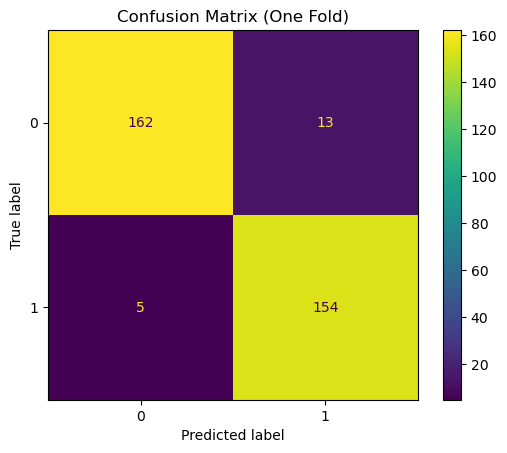

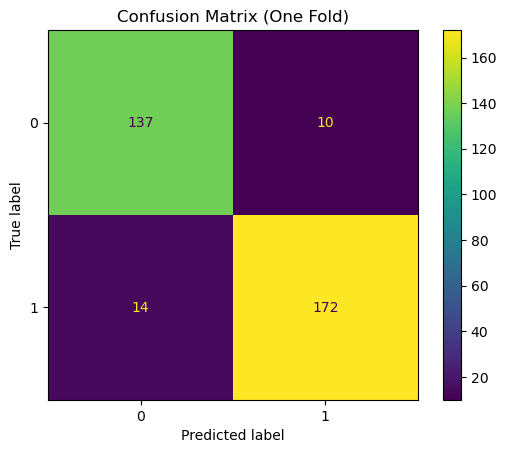

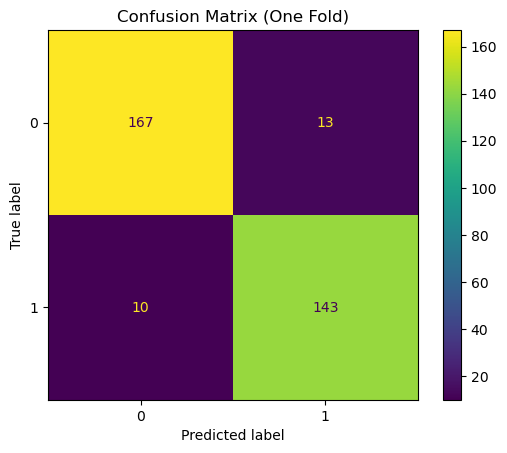

In [4]:
# Define a Support Vector Machine classifier
svm = SVC(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-4, 1e-5],
    'kernel': ['rbf', 'linear']
}

# Set up the Grid Search with K-Fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kf, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X, y)

# Print the best hyperparameters found by Grid Search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the model with the best found hyperparameters using cross-validation
best_svm = grid_search.best_estimator_
cv_scores = cross_val_score(best_svm, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation accuracy scores and the mean accuracy
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores)}")

# Plot confusion matrix for one of the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    best_svm.fit(X_train, y_train)
    y_pred = best_svm.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test)
    plt.title("Confusion Matrix (One Fold)")
    plt.show("png")

### Visualizing the effect of hyperparameters

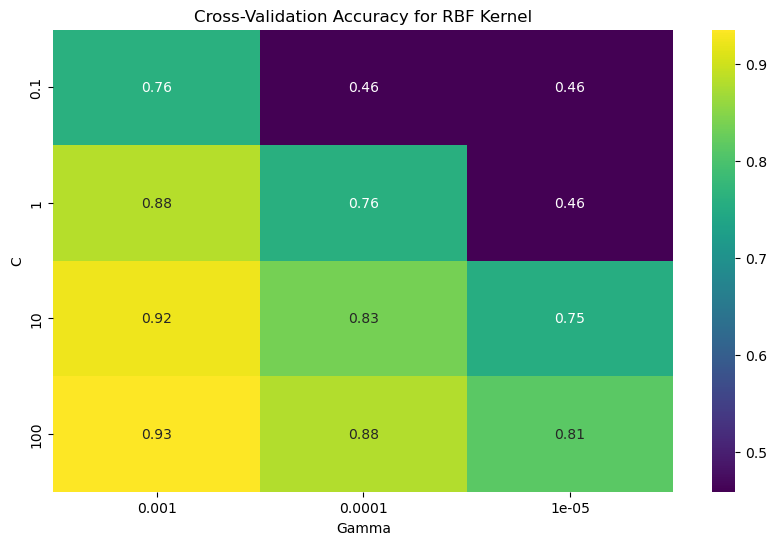

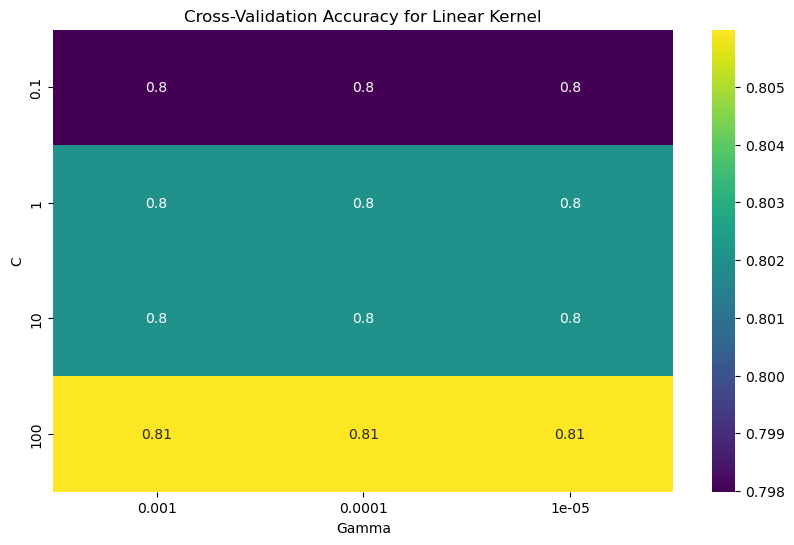

In [5]:
# Visualize the effect of hyperparameters
results = grid_search.cv_results_

# Extract results for RBF kernel
rbf_results = {param: [] for param in ['mean_test_score', 'param_C', 'param_gamma']}
for i, kernel in enumerate(results['param_kernel']):
    if kernel == 'rbf':
        for param in rbf_results:
            rbf_results[param].append(results[param][i])

# Extract results for linear kernel
linear_results = {param: [] for param in ['mean_test_score', 'param_C', 'param_gamma']}
for i, kernel in enumerate(results['param_kernel']):
    if kernel == 'linear':
        for param in linear_results:
            linear_results[param].append(results[param][i])

# Create pivot table for RBF heatmap
rbf_pivot = np.zeros((len(param_grid['C']), len(param_grid['gamma'])))
for i, C in enumerate(param_grid['C']):
    for j, gamma in enumerate(param_grid['gamma']):
        mask = (np.array(rbf_results['param_C']) == C) & (np.array(rbf_results['param_gamma']) == gamma)
        rbf_pivot[i, j] = np.mean(np.array(rbf_results['mean_test_score'])[mask])            

# Create pivot table for linear heatmap
linear_pivot = np.zeros((len(param_grid['C']), len(param_grid['gamma'])))
for i, C in enumerate(param_grid['C']):
    for j, gamma in enumerate(param_grid['gamma']):
        mask = (np.array(linear_results['param_C']) == C) & (np.array(linear_results['param_gamma']) == gamma)
        linear_pivot[i, j] = np.mean(np.array(linear_results['mean_test_score'])[mask])

# Plot heatmap for RBF kernel
plt.figure(figsize=(10, 6))
sns.heatmap(rbf_pivot, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Cross-Validation Accuracy for RBF Kernel')
plt.show("png")

# Plot heatmap for linear kernel
plt.figure(figsize=(10, 6))
sns.heatmap(linear_pivot, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Cross-Validation Accuracy for Linear Kernel')
plt.show("png")

***

### Conclusion:

### In this notebook, we explored the application of Support Vector Machines (SVMs) for a synthetic classification dataset. Initially, we employed K-Fold Cross Validation to evaluate an SVM classifier's performance, achieving an average accuracy score of 0.93.

### To optimize model performance further, we utilized Grid Search Cross-Validation with various hyperparameter combinations, ultimately identifying the best hyperparameters for both RBF and linear kernels. Visualizations of cross-validation accuracy heatmaps provided insights into how different values of c and gamma affect model performance. 

### Overall, this process highlights the importance of hyperparameter tuning and cross-validation in optimizing Machine Learning models.